In [38]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score


In [2]:
# import Dataset
df = pd.read_csv("C:\\Users\\91876\\Pictures\\Camera Roll\\british lib\\Time Series\\Human activity recognition\\test.csv")

In [3]:
# Check the Header
df.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
5,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,-0.857565,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471,2,STANDING
6,0.279746,-0.018271,-0.104000,-0.995819,-0.976354,-0.977725,-0.995996,-0.973665,-0.979253,-0.937856,...,-0.391286,-0.309083,-0.000857,0.728514,-0.333771,-0.690085,0.295282,-0.067065,2,STANDING
7,0.274601,-0.025035,-0.116831,-0.995594,-0.982069,-0.985262,-0.995341,-0.981485,-0.984610,-0.941263,...,-0.672358,-0.025526,-0.214033,0.437640,-0.366674,-0.688785,0.295981,-0.067706,2,STANDING
8,0.272529,-0.020954,-0.114472,-0.996784,-0.975906,-0.986597,-0.997029,-0.973735,-0.985556,-0.941263,...,-0.853248,0.144626,-0.035564,-0.181800,0.087320,-0.685390,0.299394,-0.065491,2,STANDING
9,0.275746,-0.010372,-0.099776,-0.998373,-0.986933,-0.991022,-0.998663,-0.987140,-0.991084,-0.943761,...,-0.741435,0.157584,-0.033487,-0.350893,0.343146,-0.684110,0.300822,-0.064263,2,STANDING


In [4]:
# Check the relationship between the variables 
df.corr()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
tBodyAcc-mean()-X,1.000000,0.041274,-0.129645,0.016984,-0.001799,-0.008065,0.022942,-0.002124,-0.010085,0.055897,...,0.027617,0.036449,-0.582641,0.026333,0.032980,0.049701,-0.058421,0.034220,0.038936,0.005077
tBodyAcc-mean()-Y,0.041274,1.000000,0.225980,-0.054264,-0.059066,-0.077051,-0.052501,-0.062012,-0.081834,-0.047736,...,0.003481,0.003612,0.112800,-0.085717,-0.003075,0.092905,-0.017138,-0.030253,-0.027410,0.003163
tBodyAcc-mean()-Z,-0.129645,0.225980,1.000000,-0.038578,-0.048340,-0.042342,-0.037851,-0.049705,-0.037628,-0.051682,...,0.032513,0.035943,0.064029,-0.050834,-0.077898,-0.021375,-0.013933,-0.007318,-0.051057,0.021476
tBodyAcc-std()-X,0.016984,-0.054264,-0.038578,1.000000,0.910636,0.896031,0.998828,0.904884,0.890581,0.983415,...,0.215845,0.189835,-0.032731,-0.004681,0.050398,-0.033609,-0.382696,0.401433,0.388747,-0.068487
tBodyAcc-std()-Y,-0.001799,-0.059066,-0.048340,0.910636,1.000000,0.874501,0.909197,0.997942,0.873176,0.894876,...,0.256692,0.227084,-0.021857,0.008462,0.027025,-0.018611,-0.383742,0.467572,0.405681,-0.036466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",0.049701,0.092905,-0.021375,-0.033609,-0.018611,-0.029401,-0.033386,-0.015864,-0.029735,-0.035835,...,0.000099,-0.003349,-0.043534,-0.004241,-0.103693,1.000000,0.026078,-0.000969,-0.031164,-0.003922
"angle(X,gravityMean)",-0.058421,-0.017138,-0.013933,-0.382696,-0.383742,-0.383490,-0.381896,-0.380548,-0.387125,-0.384454,...,-0.080410,-0.084848,-0.001915,0.003243,-0.008413,0.026078,1.000000,-0.668108,-0.615114,0.003138
"angle(Y,gravityMean)",0.034220,-0.030253,-0.007318,0.401433,0.467572,0.427469,0.397630,0.470157,0.428295,0.410477,...,0.086546,0.075210,0.006992,0.005806,0.004639,-0.000969,-0.668108,1.000000,0.425454,-0.047553
"angle(Z,gravityMean)",0.038936,-0.027410,-0.051057,0.388747,0.405681,0.488541,0.386152,0.406818,0.484416,0.398008,...,0.059939,0.056870,-0.003533,-0.000557,-0.004237,-0.031164,-0.615114,0.425454,1.000000,0.055885


In [5]:
# Check for any null values
df.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [7]:
# check for the categoris in the reponse variable
df["Activity"].value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64

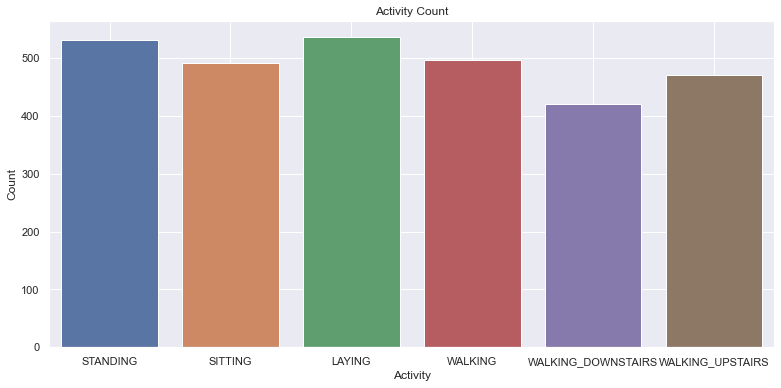

In [8]:
#check for any imbalance in response variable
sns.set(rc={'figure.figsize':(13,6)})
fig = sns.countplot(x = "Activity" , data = df)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Count")
plt.grid(True)
plt.show(fig)


In [9]:
# Split the dataset into train and test
X = df.drop(["Activity"], axis= 1)
y = df["Activity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=44)

In [10]:
# Transformation of the data
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

encoder.fit(y_train)
y_train = encoder.transform(y_train)

# encoding test labels 
encoder.fit(y_test)
y_test = encoder.transform(y_test)


scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
classifier = LogisticRegression(random_state = 0,max_iter=1000) 
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [12]:
#After training the model, it time to use it to do prediction on testing data.
y_pred = classifier.predict(X_test)

In [13]:
#Let’s test the performance of our model – Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

In [41]:
#Let’s test the performance of our model – Confusion Matrix
print ("confusion_matrix : \n", cm) 

confusion_matrix : 
 [[107   0   0   0   0   0]
 [  0  93   4   0   0   0]
 [  0   6 109   0   0   0]
 [  0   0   0 107   1   0]
 [  0   0   0   0  63   0]
 [  0   0   0   0   0 100]]


In [42]:
# check the performance matrics
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

Accuracy :  0.9813559322033898


In [43]:
# check the performance matrics
accuracy_score=accuracy_score(y_test,y_pred)
recall_score=recall_score(y_test,y_pred,average='weighted')
f1_score=f1_score(y_test,y_pred,average='weighted')
print(y_pred)
print(cm)
print(accuracy_score)
print(recall_score)
print(f1_score)

[3 0 5 2 2 2 3 1 1 5 5 2 0 0 0 0 3 3 3 5 4 5 0 1 2 4 3 1 5 3 3 5 4 4 5 0 4
 0 1 5 1 2 5 4 3 4 0 3 3 0 0 3 2 3 2 1 2 3 5 3 0 1 1 5 1 3 2 5 4 1 1 1 5 0
 5 0 0 5 5 1 2 4 5 1 0 4 5 5 2 5 0 1 2 5 0 1 2 1 3 5 0 0 1 5 5 3 2 5 2 5 0
 1 1 5 3 5 1 2 5 4 4 3 1 2 5 1 1 1 4 3 1 2 5 3 2 3 5 0 3 0 4 3 4 5 2 3 0 0
 2 5 1 0 2 0 3 2 3 1 1 5 0 1 5 1 3 4 2 2 0 0 4 1 1 4 3 0 0 0 2 5 3 0 1 1 2
 2 3 2 0 3 2 2 5 2 0 3 5 0 1 5 3 3 5 3 0 1 3 4 0 4 0 1 1 0 3 0 4 2 0 0 2 3
 0 1 1 0 3 3 1 0 1 0 4 4 1 0 2 2 3 3 0 2 2 0 1 3 1 2 2 4 3 2 2 2 5 1 0 1 2
 2 5 5 0 3 2 3 5 0 1 0 4 1 0 2 4 2 3 2 1 4 1 4 5 5 3 1 1 0 5 5 2 2 5 0 1 3
 0 1 3 1 1 2 5 0 2 3 0 3 2 3 5 4 0 1 1 2 2 5 4 4 0 2 4 3 2 0 2 0 2 2 1 1 4
 4 3 3 0 2 0 0 1 0 2 2 3 0 3 2 5 5 2 5 2 5 4 0 1 4 1 3 1 1 3 4 3 2 0 5 5 5
 0 4 3 0 0 2 3 3 3 5 4 3 0 1 5 2 5 4 0 0 1 2 1 0 5 1 2 1 0 3 2 5 5 3 1 4 5
 2 5 2 3 0 1 0 0 5 4 2 0 5 5 4 4 3 2 0 3 2 5 5 2 0 5 2 1 3 1 1 0 2 5 1 4 1
 5 1 1 2 4 5 3 5 5 3 3 3 0 1 1 3 3 4 5 4 2 4 2 3 3 0 2 3 2 0 2 2 3 3 0 2 3
 5 0 3 4 1 1 2 4 5 2 2 3 

[[107   0   0   0   0   0]
 [  0  93   4   0   0   0]
 [  0   6 109   0   0   0]
 [  0   0   0 107   1   0]
 [  0   0   0   0  63   0]
 [  0   0   0   0   0 100]]


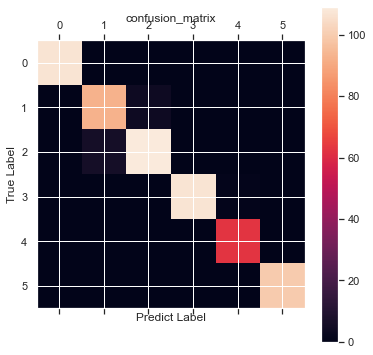

In [45]:
# plot the confusion_matrix
y_test= y_test
y_pred = y_pred
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title("confusion_matrix")
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel("Predict Label")
plt.show()